In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# 读取所有股票信息，并切片出缩写名
all_stocks = pd.read_csv('selected_30_stocks.csv')
all_stocks = all_stocks.drop(columns=['Unnamed: 0','name'])

'''
随机选取10支股票,把股票名放进数组
@return: 放有10支随机选取的股票名的数组
''' 
def select_10_stocks_randomly():
    
    global select_10_stocks_array
    select_10_stocks = all_stocks.sample(n=10, replace=False, axis=0)
    select_10_stocks_array = select_10_stocks['stock'].values
    
    return select_10_stocks_array

# select_10_stocks_randomly()


In [6]:
'''
根据数组中的函数名生成dataframe
@return: 装有10个dataframe的字典
'''
def generate_dataframe():
    
    # 根据股票名读取 csv，生成对应 dataframe 并存进字典中
    global stock_name
    stock_name = {}
    
    for name in select_10_stocks_array:
        stock_name[name] = pd.read_csv(name + '_week_features_rescaled.csv') 
        stock_name[name] = stock_name[name].drop(columns=['Unnamed: 0',
                                                          'name',
                                                          'start_time',
                                                          'end_time',
                                                          'days',
                                                          '成交量均值',
                                                          '成交金额均值',
                                                          '上周涨跌幅',
                                                          '涨跌幅均值',
                                                          '股价波动程度',
                                                          '开收盘价方差'], axis=1)
    return stock_name

# generate_dataframe()


In [3]:
'''
选取所有股票,把股票名放进数组
@return: 放有所有股票名的数组
''' 
def select_all_stocks(): 
    
    global select_all_stocks_array
    select_all_stocks = all_stocks.sample(n=30, replace=False, axis=0)
    select_all_stocks_array = select_all_stocks['stock'].values
    
    return select_all_stocks_array

# select_10_stocks_randomly()

In [7]:
'''
生成所有股票的dataframe
@return: 装有所有dataframe的字典
'''
def generate_all_dataframe():
    
    # 根据股票名读取 csv，生成对应 dataframe 并存进字典中
    global all_stock_name
    all_stock_name = {}
    
    for name in select_all_stocks_array:
        all_stock_name[name] = pd.read_csv(name + '_week_features_rescaled.csv') 
        all_stock_name[name] = all_stock_name[name].drop(columns=['Unnamed: 0',
                                                                  'name',
                                                                  'start_time',
                                                                  'end_time',
                                                                  'days',
                                                                  '成交量均值',
                                                                  '成交金额均值',
                                                                  '上周涨跌幅',
                                                                  '涨跌幅均值',
                                                                  '股价波动程度',
                                                                  '开收盘价方差'], axis=1)
    return all_stock_name

# generate_all_dataframe()


In [8]:
# 字典中的dataframe效果
# stock_name['LUV']


In [9]:
'''
随机策略计算第i周的收益率
@param i: 周数
@return: 第i周收益率数值
'''
def calculate_weekprofit(i):

    for value in stock_name.values():
        
        global week_total_profit
        week_total_profit = 0
    
        week_total_profit = week_total_profit + value.iloc[i,1] * 0.1
    
    return week_total_profit
 

# calculate_weekprofit(0)


In [10]:
'''
计算第i周的大盘收益率
@param i: 周数
@return: 第i周大盘收益率数值
'''
def calculate_all_weekprofit(i):
    for value in all_stock_name.values():       
        global all_week_total_profit
        all_week_total_profit = 0 
        all_week_total_profit = all_week_total_profit + value.iloc[i,1] * (1/30)  
    return all_week_total_profit
 
# calculate_weekprofit(0)


In [11]:
# 主函数，计算297周的总收益，并存进profit表里
profit = pd.DataFrame(columns=['week_profit'])

for i in range(298):
    
    total_profit = 0
    
    select_10_stocks_randomly()
    generate_dataframe()
    calculate_weekprofit(i)
    
    profit.loc[i] = week_total_profit


In [15]:
#计算297周的大盘总收益，并存进all_profit表里
all_profit = pd.DataFrame(columns=['all_week_profit'])

for i in range(298):
    
    total_profit = 0
    
    select_all_stocks()
    generate_all_dataframe()
    calculate_all_weekprofit(i)
    
    all_profit.loc[i] = all_week_total_profit


In [16]:
profit

,week_profit
0,-0.034993
1,-0.073468
2,-0.055638
3,-0.013827
4,0.077397
...,...
293,-0.102689
294,0.144741
295,0.023529
296,-0.114603


In [110]:
# 转置策略收益率表
three_profit = pd.read_csv('three_profit.csv')
three_profit = three_profit.stack()
three_profit = three_profit.unstack(0)


In [111]:
# 补充策略收益率表
d = {0:['0.225766', '0.225766', '0.225766']}
df = pd.DataFrame(d) 
df


,0
0,0.225766
1,0.225766
2,0.225766


In [112]:
# 去除无用列
three_profit = three_profit.drop(labels=['Unnamed: 0', 'index'])


In [113]:
# 分割不同策略
three_profit_09 = three_profit[0]
three_profit_05 = three_profit[1]
three_profit_01 = three_profit[2]


In [114]:
three_profit_09


0      0.225766
1      0.348072
2      0.903805
3      0.667169
4      0.916600
         ...   
290    0.290490
291   -0.033396
292    0.233623
293    0.116632
294   -0.177222
Name: 0, Length: 295, dtype: float64

In [115]:
# 合并两个策略表
three_profit_09 = pd.concat([df,three_profit_09], ignore_index=True) #普通纵向合并
three_profit_05 = pd.concat([df,three_profit_05], ignore_index=True) #普通纵向合并
three_profit_01 = pd.concat([df,three_profit_01], ignore_index=True) #普通纵向合并


In [132]:
# 绘图前需统一为浮点数，否则会报错
three_profit_09 = three_profit_09.astype('float64')
three_profit_05 = three_profit_05.astype('float64')
three_profit_01 = three_profit_01.astype('float64')


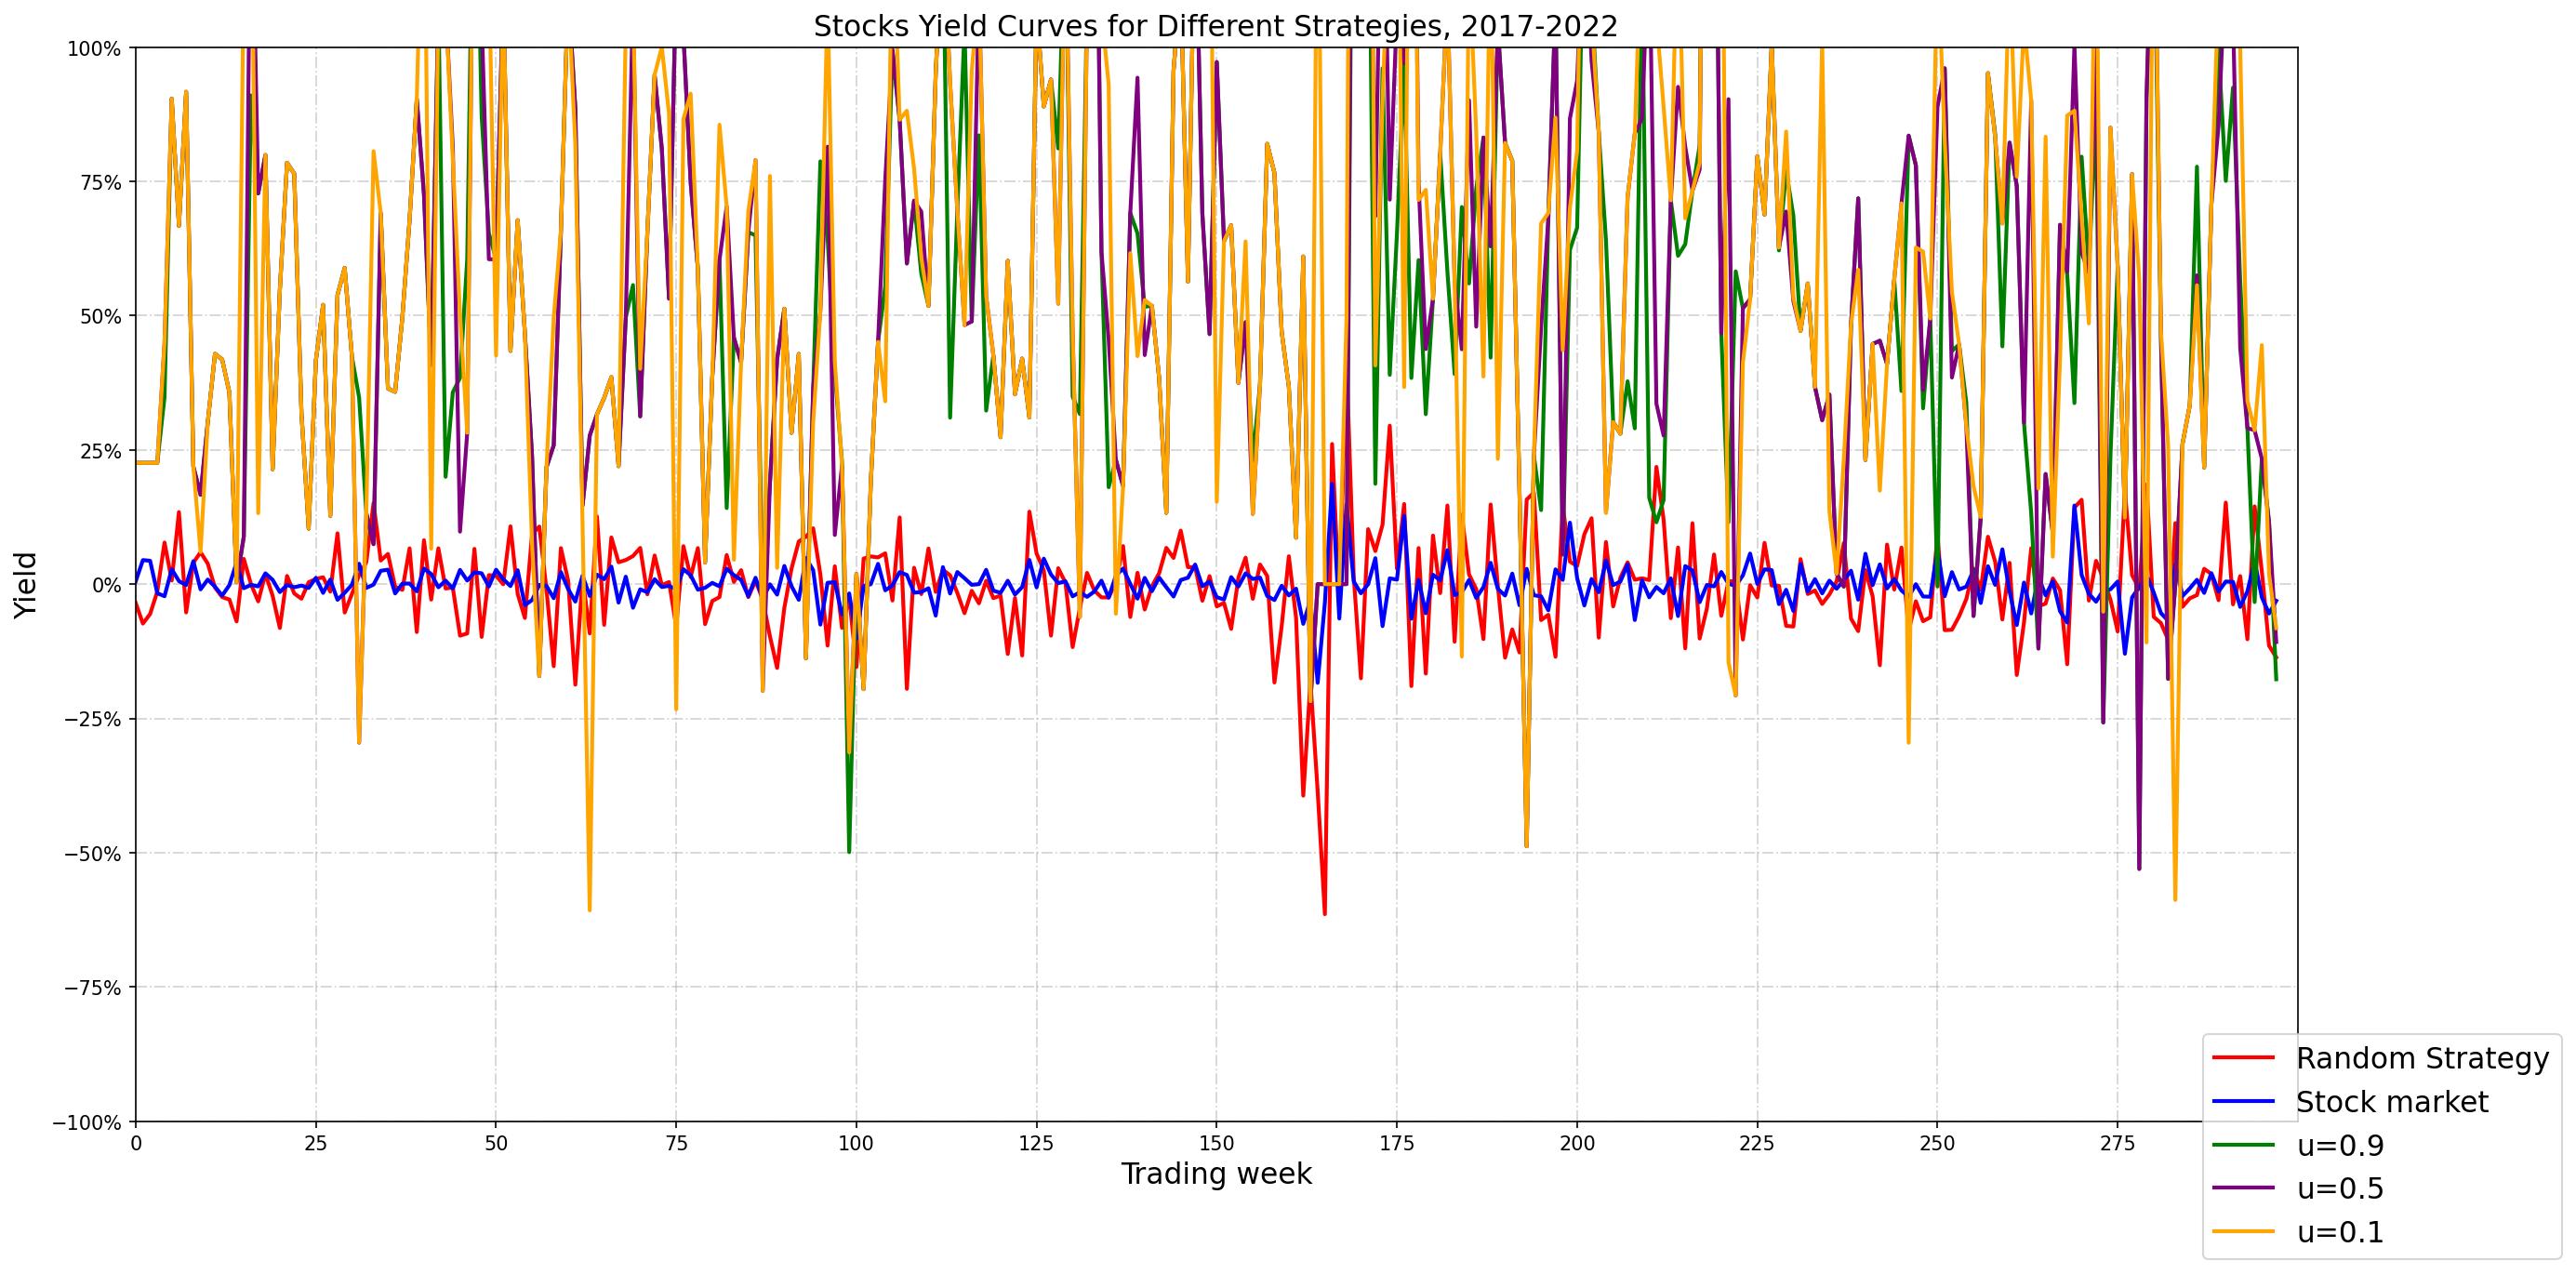

In [149]:
from matplotlib import ticker

plt.figure(figsize=(20, 10), dpi=150, frameon=True)

# 随机策略收益曲线
plt.plot(profit.index, profit, label='yield_curve', ls="-", c='Red', lw=2)
# 大盘收益曲线
plt.plot(all_profit.index, all_profit, label='yield_curve', ls="-", c='blue', lw=2)
# u=0.9 策略收益曲线
plt.plot(three_profit_09.index, three_profit_09, label='yield_curve', ls="-", c='green', lw=2)
# u=0.5 策略收益曲线
plt.plot(three_profit_05.index, three_profit_05, label='yield_curve', ls="-", c='purple', lw=2)
# u=0.1 策略收益曲线
plt.plot(three_profit_01.index, three_profit_01, label='yield_curve', ls="-", c='orange', lw=2)

# x轴标签
plt.xlabel('Trading week', fontsize=15)

# y轴标签
plt.ylabel('Yield', fontsize=15)

# 图表标题
plt.title('Stocks Yield Curves for Different Strategies, 2017-2022',fontsize=15)

# 图表背景
plt.grid(alpha=0.5, linestyle='-.', linewidth=0.9)

# 线条标签
plt.figlegend(['Random Strategy','Stock market','u=0.9','u=0.5','u=0.1'], loc='lower right', fontsize=15)

# x轴范围
plt.xlim(0,300)

# y轴范围
plt.ylim(-1,1)

# x轴标签间隔
plt.xticks (range(0, 300, 25))

# y轴使用百分比展示
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))


plt.show()
